# Polish tweets annotations

In [1]:
from os.path import join
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = join("wust_2k20_twitter_emotion_annotations.json")

In [3]:
df = pd.read_json(path)
df = df.drop(["id"], axis=1)
df

,tweet,most_common_annotation,annotation_1,annotation_2,annotation_3,num_different_annotations,num_total_annotations
0,Miesięczny (30 dni) przyrost zgonów na #korona...,neutralne,neutralne,neutralne,neutralne,1.0,3
1,#WROCŁAWAktualna #MAPA korków przekraczających...,neutralne,neutralne,neutralne,neutralne,1.0,3
2,Wigilię w @krecisie czas zacząć #christmas #św...,neutralne,radosc,neutralne,neutralne,2.0,3
3,Dzisiaj szału nie będzie. Nie bez powodu robi ...,smutek,smutek,neutralne,smutek,2.0,3
4,#IgaŚwiatek Jazda Jazda Młoda gwiazda coś pię...,podziw,podziw,podziw,podziw,1.0,3
...,...,...,...,...,...,...,...
5396,Nowoczesna technologia nie zmieniła ludzkiej n...,neutralne,neutralne,smutek,neutralne,2.0,3
5397,"Jak patrzę na jedzenie, to mi się odechciewa O...",wstret,wstret,wstret,zaskoczenie,2.0,3
5398,HAHAHAHA ŚWIĄTECZNA REKLAMA ORANGE NA POLSACE ...,zaskoczenie,zaskoczenie,radosc,zaskoczenie,2.0,3
5399,"@iGrabann a przepraszam, faktycznie, pomyłka, ...",radosc,neutralne,radosc,radosc,2.0,3


# Three annotations

## Three same annotations

In [4]:
three_annotations_one_emotion_df = df[(df.num_total_annotations == 3) & (df.num_different_annotations == 1)] 

f"{len(three_annotations_one_emotion_df)} tweets with 3 annotations and 1 emotion"

'2235 tweets with 3 annotations and 1 emotion'

## Two same one different

In [5]:
three_annotations_two_emotions_df = df[(df.num_total_annotations == 3) & (df.num_different_annotations == 2)] 


f"{len(three_annotations_two_emotions_df)} tweets with 3 annotations and 2 emotions"

'1852 tweets with 3 annotations and 2 emotions'

## All three different

In [6]:
three_annotations_three_emotions_df = df[(df.num_total_annotations == 3) & (df.num_different_annotations == 3)] 


f"{len(three_annotations_three_emotions_df)} tweets with 3 annotations and 3 emotions"

'542 tweets with 3 annotations and 3 emotions'

# Two annotations

## Two same annotations

In [7]:
two_annotations_one_emotion_df = df[(df.num_total_annotations == 2) & (df.num_different_annotations == 1)]  


f"{len(two_annotations_one_emotion_df)} tweets with 2 annotations and 1 emotion"

'124 tweets with 2 annotations and 1 emotion'

## Two different annotations 

In [8]:
two_annotations_two_emotions_df = df[(df.num_total_annotations == 2) & (df.num_different_annotations == 2)]  


f"{len(two_annotations_two_emotions_df)} tweets with 2 annotations and 2 emotions"

'50 tweets with 2 annotations and 2 emotions'

# Single annotation

In [9]:
one_annotation_df = df[df.num_total_annotations == 1] 

f"{len(one_annotation_df)} tweets with 1 annotations and 1 emotion"

'232 tweets with 1 annotations and 1 emotion'

# No annotation

In [10]:
no_annotation_df = df[df.num_total_annotations == 0] 

f"{len(no_annotation_df)} tweets without an annotation"

'366 tweets without an annotation'

## Sum of lengths of subsets of annotation

In [11]:
len(three_annotations_one_emotion_df) + len(three_annotations_two_emotions_df) + len(three_annotations_three_emotions_df) + len(two_annotations_one_emotion_df) + len(two_annotations_two_emotions_df) + len(one_annotation_df) + len(no_annotation_df)

5401

# EDA

In [12]:
frames = [three_annotations_one_emotion_df, three_annotations_two_emotions_df, two_annotations_one_emotion_df]

reliable_df = pd.concat(frames)
# reliable_df = reliable_df[reliable_df.most_common_annotation != "neutralne"]
len(reliable_df)

4211

In [13]:
reliable_df.most_common_annotation.value_counts()

neutralne      2587
zlosc           464
radosc          414
podziw          258
oczekiwanie     139
wstret          118
smutek          103
strach           65
zaskoczenie      63
Name: most_common_annotation, dtype: int64

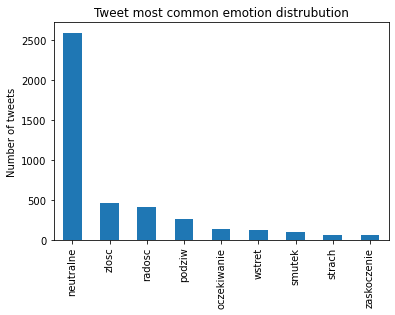

In [14]:
fig, ax = plt.subplots()
plt.title("Tweet most common emotion distrubution")
plt.ylabel("Number of tweets")
reliable_df['most_common_annotation'].value_counts().plot(ax=ax, kind='bar')
plt.show()

In [15]:
reliable_df_without_neutral = reliable_df[reliable_df.most_common_annotation != "neutralne"]
len(reliable_df_without_neutral)

1624

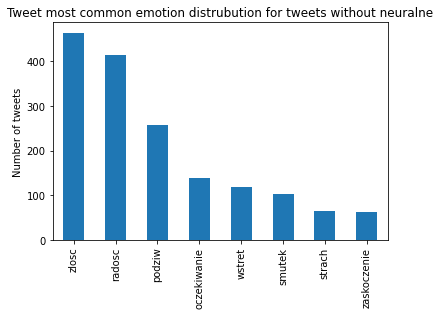

In [16]:
fig, ax = plt.subplots()
plt.title("Tweet most common emotion distrubution for tweets without neuralne")
plt.ylabel("Number of tweets")
reliable_df_without_neutral['most_common_annotation'].value_counts().plot(ax=ax, kind='bar')
plt.show()

# HERBERT
https://huggingface.co/allegro/herbert-base-cased

In [17]:
!pip install transformers

  Created wheel for sacremoses: filename=sacremoses-0.0.43-py3-none-any.whl size=893262 sha256=b47b8054038a9188f690f670a9987f748e4202aecc972750cc88abcff6f3424d
  Stored in directory: c:\users\wilk-pc\appdata\local\pip\cache\wheels\7b\78\f4\27d43a65043e1b75dbddaa421b573eddc67e712be4b1c80677
Successfully built sacremoses


In [17]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
import torch
MODEL_NAME = "allegro/herbert-base-cased"

ModuleNotFoundError: No module named 'torch'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("allegro/herbert-base-cased")
model_herbert = AutoModel.from_pretrained("allegro/herbert-base-cased")

In [21]:
df=df.dropna(subset=['most_common_annotation'])
dataset=df[['tweet']]
labels = df['most_common_annotation']
dataset

,tweet
0,Miesięczny (30 dni) przyrost zgonów na #korona...
1,#WROCŁAWAktualna #MAPA korków przekraczających...
2,Wigilię w @krecisie czas zacząć #christmas #św...
3,Dzisiaj szału nie będzie. Nie bez powodu robi ...
4,#IgaŚwiatek Jazda Jazda Młoda gwiazda coś pię...
...,...
5396,Nowoczesna technologia nie zmieniła ludzkiej n...
5397,"Jak patrzę na jedzenie, to mi się odechciewa O..."
5398,HAHAHAHA ŚWIĄTECZNA REKLAMA ORANGE NA POLSACE ...
5399,"@iGrabann a przepraszam, faktycznie, pomyłka, ..."


In [ ]:
tokenized = dataset['tweet'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
tokenized

Wszystkie tokeny powinny mieć tą samą długość więc dodamy token = 0, na koniec każdego krótszego

In [ ]:
longest_size = 0
longest_token = None
for i , token in enumerate(tokenized.values):
    if len(token) > longest_size:
        longest_size = len(token)
        longest_token = i

In [ ]:
dataset['tweet'][longest_token]

In [ ]:
len(dataset['tweet'][longest_token])

In [ ]:
padded = np.array([i + [0]*(longest_size-len(i)) for i in tokenized.values])
padded.shape

In [ ]:
padded

Chcemy skorzystać z GPU


Wszystkie zdania mają teraz długość 234. 

In [ ]:
input_ids = torch.tensor(np.array(padded)).to(torch.int64)
input_ids[:200]

In [ ]:
with torch.no_grad():
    last_hidden_states = model_herbert(input_ids[:10])

In [ ]:
last_hidden_states

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()
features

Ponieważ mam mało ramu prezentuje przedstawienie wag z Herberta do klasyfikatora, pierwszych 10 zdań. Tak więc zdanie:

In [ ]:
dataset['tweet'][0]

To jako wagi dla klasyfiaktora: 

In [ ]:
last_hidden_states[0][0]

Zgodnie z informacjami o modelu powiniśmy miec 768 wag, co widać poniżej

In [ ]:
last_hidden_states[0][0].shape

# Tworzenie klasyfikatora w TF

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import f1_score, accuracy_score
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm

In [32]:
pd.unique(labels)

array(['neutralne', 'smutek', 'podziw', 'zlosc', 'radosc', 'strach',
       'oczekiwanie', 'wstret', 'zaskoczenie'], dtype=object)

In [33]:
labels_dict = {
    'neutralne' : 0,
    'smutek' : 1,
    'podziw' : 2,
    'zlosc' : 3,
    'strach' : 4,
    'oczekiwanie' : 5,
    'wstret' : 6,
    'zaskoczenie' : 7,
    'radosc' : 8
}
labels

0         neutralne
1         neutralne
2         neutralne
3            smutek
4            podziw
           ...     
5396      neutralne
5397         wstret
5398    zaskoczenie
5399         radosc
5400    zaskoczenie
Name: most_common_annotation, Length: 4211, dtype: object

In [34]:
pd.unique(labels)

array(['neutralne', 'smutek', 'podziw', 'zlosc', 'radosc', 'strach',
       'oczekiwanie', 'wstret', 'zaskoczenie'], dtype=object)

In [35]:
y=labels.map(labels_dict)

In [36]:
y.isnull().any()


False

In [37]:
batch_size = 200
arr = None
input_ids.size()[0]

NameError: name 'input_ids' is not defined

In [38]:
for i in tqdm(range(0,input_ids.size()[0], batch_size)):
      with torch.no_grad():
        last_hidden_states = model_herbert(input_ids[i:i+batch_size])    
        features = last_hidden_states[0][:,0,:].numpy()
        if arr is None:
            arr = features
            print(type(arr))
        else:
            arr=np.concatenate((arr,features))
        print(arr.shape)
        pickle.dump( arr, open( "inputs.p", "wb" ) )

NameError: name 'input_ids' is not defined

In [39]:
df = pd.read_pickle("inputs.p")

In [40]:
df.shape

(4211, 768)

In [41]:
classes = len(labels_dict)
classes

9

In [42]:
input_shape = df.shape

In [54]:
def f1(y_true,y_pred):
    re= tf.argmax(y_pred,axis=1)
    re = tf.reshape(re,[-1,1])
    #print(re.shape, y_true.shape)
    F1 = f1_score(y_true=y_true.numpy(),y_pred=re,average="macro")
    return F1

In [55]:
model = Sequential()
model.add(Dense(256, input_shape=input_shape, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [63]:
log_dir = 'logs2'
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir, histogram_freq=1,
)

In [64]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy',f1],
    run_eagerly=True #for tensor.numpy() in f1 score metric
)

In [65]:
model.fit(x=df,y=y,epochs=25,validation_split=0.2,callbacks=[tensorboard_callback],shuffle=True)

Epoch 1/25
106/106 [==============================] - 5s 43ms/step - loss: 0.5730 - accuracy: 0.8198 - f1: 0.5223 - val_loss: 1.3719 - val_accuracy: 0.6441 - val_f1: 0.2683
Epoch 2/25
106/106 [==============================] - 5s 43ms/step - loss: 0.5211 - accuracy: 0.8334 - f1: 0.5436 - val_loss: 1.3717 - val_accuracy: 0.6477 - val_f1: 0.2948
Epoch 3/25
106/106 [==============================] - 5s 45ms/step - loss: 0.4958 - accuracy: 0.8471 - f1: 0.5514 - val_loss: 1.3640 - val_accuracy: 0.6477 - val_f1: 0.2864
Epoch 4/25
106/106 [==============================] - 4s 42ms/step - loss: 0.4708 - accuracy: 0.8560 - f1: 0.5768 - val_loss: 1.4065 - val_accuracy: 0.6453 - val_f1: 0.2892
Epoch 5/25
106/106 [==============================] - 4s 42ms/step - loss: 0.4558 - accuracy: 0.8554 - f1: 0.5692 - val_loss: 1.4514 - val_accuracy: 0.6489 - val_f1: 0.2865
Epoch 6/25
106/106 [==============================] - 5s 43ms/step - loss: 0.4329 - accuracy: 0.8605 - f1: 0.5842 - val_loss: 1.4592 - 

In [ ]:
df.shape

In [66]:
%load_ext tensorboard

In [67]:
%tensorboard --logdir logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 19204.